In [1]:
import pandas as pd

# CSV 파일로부터 데이터 불러오기
data = pd.read_csv('[24-2 DS_Project1] Data_Submission/[24-2 DS_Project1] Data.csv')

# 데이터프레임의 기본 정보 확인
print("데이터 정보:\n", data.info())  # 각 열의 타입, 결측치 등을 확인

# 데이터의 첫 몇 줄 확인
print("데이터 첫 5줄:\n", data.head())

# 데이터의 컬럼명 확인
print("컬럼명:\n", data.columns)

# 결측치 확인
print("결측치:\n", data.isnull().sum())

# 기술 통계 확인
print("기술 통계:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644768 entries, 0 to 1644767
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   User                           1644768 non-null  int64  
 1   Gender                         1644768 non-null  int64  
 2   Current Age                    1644768 non-null  int64  
 3   Retirement Age                 1644768 non-null  int64  
 4   Birth Year                     1644768 non-null  int64  
 5   Birth Month                    1644768 non-null  int64  
 6   Zipcode                        1644768 non-null  float64
 7   Per Capita Income - Zipcode    1644768 non-null  int64  
 8   Yearly Income                  1644768 non-null  float64
 9   Total Debt                     1644768 non-null  float64
 10  Credit Score                   1644768 non-null  int64  
 11  Year                           1644768 non-null  int64  
 12  Month         

a) 사용자 정보:
      - User (int64): 사용자 고유 식별자
      - Gender (int64): 성별
      - Current Age (int64): 현재 나이
      - Retirement Age (int64): 은퇴 나이
      - Birth Year (int64): 출생 연도
      - Birth Month (int64): 출생 월
      - Zipcode (float64): 행정 구역 우편번호
      - Per Capita Income - Zipcode (float64): 우편번호 행정 구역 기준 1인당 소득
      - Yearly Income (float64): 연간 소득
      - Total Debt (float64): 총 부채
      - Credit Score (int64): 신용 점수

   b) 카드 정보:
      - Card (int64): 카드 식별자
      - Card Brand (object): 카드 브랜드
      - Card Type (object): 카드 유형
      - Card Number (float64): 카드 번호
      - Expires (object): 카드 만료일
      - Has Chip (bool): 보안 칩 탑재 여부
      - Credit Limit (int64): 신용 한도
      - Acct Open Date (object): 계좌 개설일
      - Year PIN Last Changed (int64): 보안 비밀번호 마지막 변경 연도

   c) 거래 정보:
      - Year (int64): 거래 연도
      - Month (int64): 거래 월
      - Day (int64): 거래 일
      - Amount (float64): 거래 금액
      - Merchandise Code (int64): 상품 코드

   d) 보안 및 사기 관련:
      - Whether Security Chip is Used (int64): 보안 칩 사용 여부
      - Error Message (object): 오류 메시지
      - Is Fraud? (object): 사기 여부 (정답)

In [2]:
# 'Error Message' 열을 제외한 새로운 DataFrame 생성
data_without_error_message = data.drop(columns=['Error Message'])

# 새로운 데이터프레임 확인
print(data_without_error_message.head())


   User  Gender  Current Age  Retirement Age  Birth Year  Birth Month  \
0     0       0           53              66        1966           11   
1     0       0           53              66        1966           11   
2     0       0           53              66        1966           11   
3     0       0           53              66        1966           11   
4     0       0           53              66        1966           11   

   Zipcode  Per Capita Income - Zipcode  Yearly Income    Total Debt  ...  \
0   8250.0                     17420410     52077100.0  9.088794e+07  ...   
1   8250.0                     17420410     52077100.0  9.088794e+07  ...   
2   8250.0                     17420410     52077100.0  9.088794e+07  ...   
3   8250.0                     17420410     52077100.0  9.088794e+07  ...   
4   8250.0                     17420410     52077100.0  9.088794e+07  ...   

   Card Type   Card Number  Expires  Has Chip  Credit Limit  Acct Open Date  \
0      Debit  5.655

In [3]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 인코딩
label_encoder = LabelEncoder()

# 예시: 'Has Chip' 'Card Brand', 'Card Type', 'Is Fraud?' 인코딩
data['Has Chip'] = label_encoder.fit_transform(data['Has Chip'])
data['Card Brand'] = label_encoder.fit_transform(data['Card Brand'])
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])
data['Is Fraud?'] = label_encoder.fit_transform(data['Is Fraud?'])


In [4]:
print(data['Has Chip'],data['Card Brand'],data['Card Type'],data['Is Fraud?'])

0          1
1          1
2          1
3          1
4          1
          ..
1644763    1
1644764    1
1644765    1
1644766    1
1644767    1
Name: Has Chip, Length: 1644768, dtype: int64 0          2
1          2
2          2
3          2
4          2
          ..
1644763    2
1644764    2
1644765    2
1644766    2
1644767    2
Name: Card Brand, Length: 1644768, dtype: int64 0          1
1          1
2          1
3          1
4          1
          ..
1644763    0
1644764    0
1644765    0
1644766    0
1644767    0
Name: Card Type, Length: 1644768, dtype: int64 0          0
1          0
2          0
3          0
4          0
          ..
1644763    0
1644764    0
1644765    0
1644766    0
1644767    0
Name: Is Fraud?, Length: 1644768, dtype: int64


In [5]:
print("데이터 정보:\n", data.info())  # 각 열의 타입, 결측치 등을 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644768 entries, 0 to 1644767
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   User                           1644768 non-null  int64  
 1   Gender                         1644768 non-null  int64  
 2   Current Age                    1644768 non-null  int64  
 3   Retirement Age                 1644768 non-null  int64  
 4   Birth Year                     1644768 non-null  int64  
 5   Birth Month                    1644768 non-null  int64  
 6   Zipcode                        1644768 non-null  float64
 7   Per Capita Income - Zipcode    1644768 non-null  int64  
 8   Yearly Income                  1644768 non-null  float64
 9   Total Debt                     1644768 non-null  float64
 10  Credit Score                   1644768 non-null  int64  
 11  Year                           1644768 non-null  int64  
 12  Month         

상관관계 계산

처음은 전체 상관관계 분석을 하는데 그러한 이유는 전체적인 변수끼리의 관계를 통하여 패턴이나 경향을 파악하여 어떤 것의 관계성이 있는지 일단 시각화

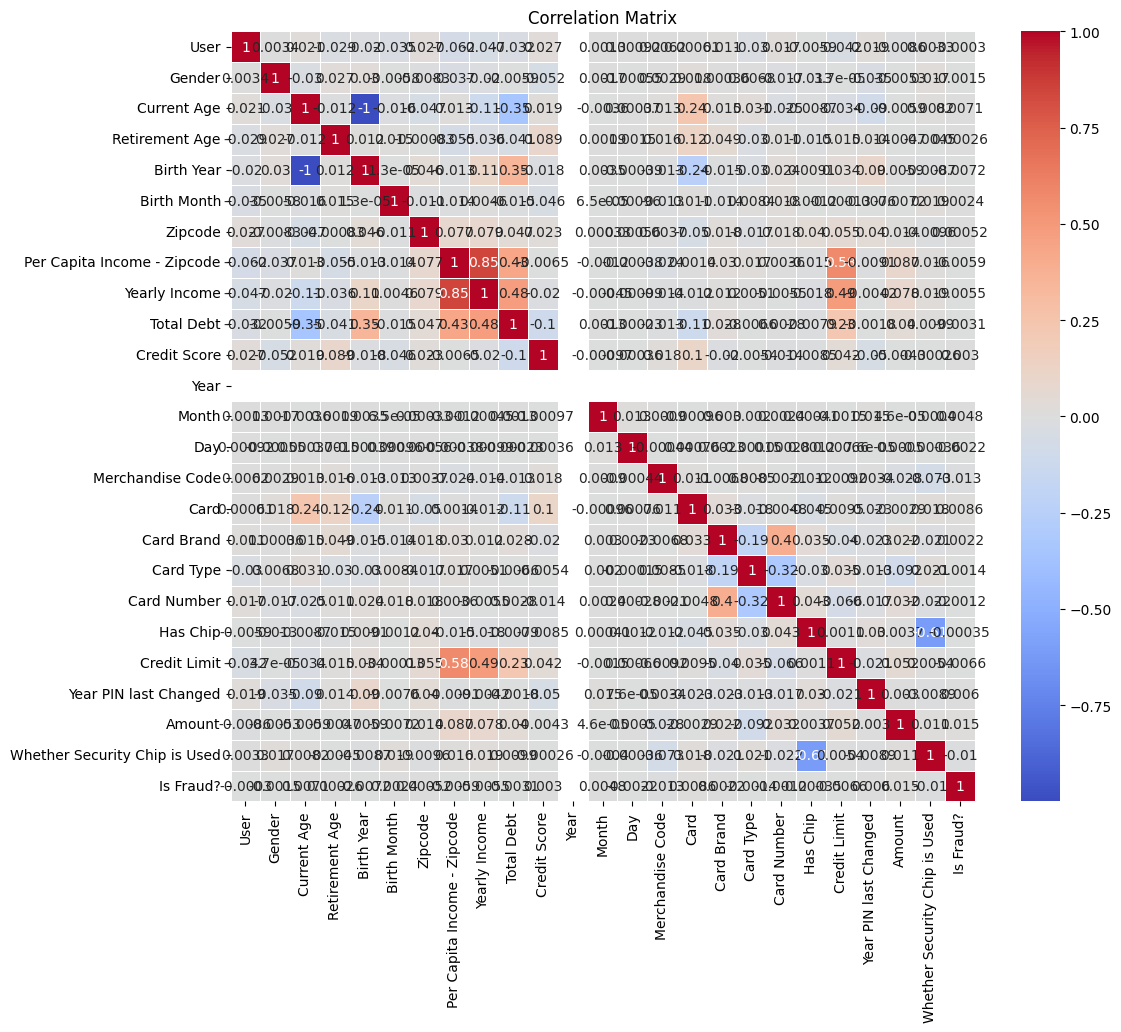

사기 여부와 상관관계가 높은 변수들:
 Is Fraud?                        1.000000
Amount                           0.015480
Card                             0.008580
Current Age                      0.007118
Year PIN last Changed            0.005981
Month                            0.004825
Credit Score                     0.003002
Birth Month                      0.002408
Card Brand                       0.002222
Zipcode                          0.000522
Retirement Age                   0.000257
User                            -0.000300
Has Chip                        -0.000350
Card Number                     -0.001207
Card Type                       -0.001389
Gender                          -0.001504
Day                             -0.002230
Total Debt                      -0.003129
Yearly Income                   -0.005501
Per Capita Income - Zipcode     -0.005938
Credit Limit                    -0.006642
Birth Year                      -0.007207
Whether Security Chip is Used   -0.010423
Merchandise 

In [6]:
#전체 상관관계 분석
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# 상관관계 분석을 위한 상관행렬 계산 (수치형 데이터만 포함)
corr_matrix = numeric_data.corr()

# 상관행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 특정 변수 (예: 'Is Fraud?')와 가장 상관관계가 높은 변수들 확인
fraud_corr = corr_matrix['Is Fraud?'].sort_values(ascending=False)
print("사기 여부와 상관관계가 높은 변수들:\n", fraud_corr)


그 이후 사기와 관련된 것만 해보려고 함.

Is Fraud?                        1.000000
Amount                           0.015480
Card                             0.008580
Current Age                      0.007118
Year PIN last Changed            0.005981
Month                            0.004825
Credit Score                     0.003002
Birth Month                      0.002408
Card Brand                       0.002222
Zipcode                          0.000522
Retirement Age                   0.000257
User                            -0.000300
Has Chip                        -0.000350
Card Number                     -0.001207
Card Type                       -0.001389
Gender                          -0.001504
Day                             -0.002230
Total Debt                      -0.003129
Yearly Income                   -0.005501
Per Capita Income - Zipcode     -0.005938
Credit Limit                    -0.006642
Birth Year                      -0.007207
Whether Security Chip is Used   -0.010423
Merchandise Code                -0

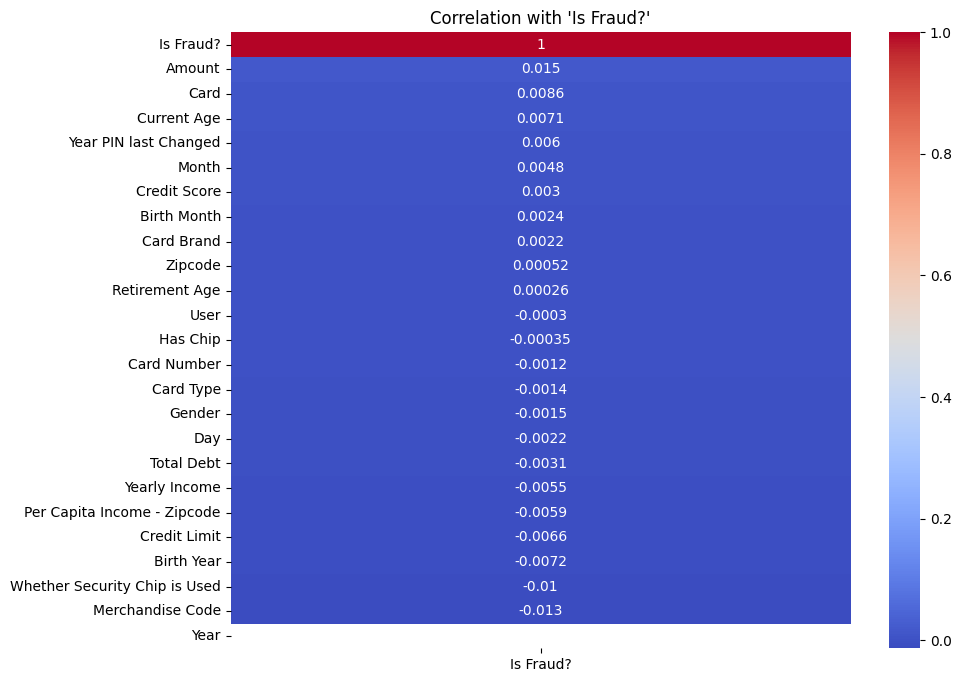

In [7]:
# 숫자형 데이터만 선택해서 상관관계 계산
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
corr_matrix = numeric_data.corr()

# 'Is Fraud?' 변수와의 상관계수 출력
print(corr_matrix['Is Fraud?'].sort_values(ascending=False))

# 상관관계 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Is Fraud?']].sort_values(by='Is Fraud?', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with 'Is Fraud?'")
plt.show()


1. 비선형 관계: 상관계수는 주로 선형적인 관계를 나타낸다. 만약 사기 여부와 다른 변수들 간의 관계가 비선형적이라면, 상관계수 값이 낮게 나올 수 있다. 이 경우 상관계수 대신 결정 트리 모델이나 다른 비선형 모델을 사용해 변수 중요도를 평가하는 것이 더 효과적일 수 있다.

2. 데이터 전처리: 범주형 데이터를 적절히 처리했는지, 혹은 중요한 변수를 놓치지 않았는지 다시 한 번 확인할 필요가 있다. 예를 들어, 날짜 데이터를 단순한 연, 월, 일로 분리하지 않고 더 의미 있는 방식으로 변환할 수 있는지 검토할 수 있다.

3. 피처 엔지니어링: 상관계수 분석만으로 중요한 변수를 모두 찾아내기 어려울 수 있다. 추가적인 피처 엔지니어링(예: 날짜 변환, 피처 결합, 로그 변환 등)을 통해 중요한 변수를 새롭게 만들 수 있다.

따라서 상관계수 분석만으로 변수의 중요성을 평가하기 어렵다면, 결정 트리, 로지스틱 회귀, PCA 같은 기법을 함께 사용하여 변수를 탐색하는 것이 좋다.

- 그 중 결정 트리 모델을 통한 변수 중요도 추출 방법 사용하고자 함.
결정 트리는 비선형 관계를 탐지할 수 있기 때문에 상관계수 대신 결정 트리 모델을 사용하여 변수의 중요도를 평가할 수 있다. DecisionTreeClassifier를 사용하면 각 변수의 중요도를 추출할 수 있다.



Feature Importances:
 Amount                           0.186852
Day                              0.130710
Month                            0.129682
Merchandise Code                 0.112535
Card Number                      0.053756
Credit Limit                     0.048747
Credit Score                     0.038978
User                             0.032603
Per Capita Income - Zipcode      0.031750
Zipcode                          0.030127
Yearly Income                    0.028738
Total Debt                       0.028488
Year PIN last Changed            0.024382
Birth Year                       0.021459
Retirement Age                   0.019266
Card                             0.017593
Whether Security Chip is Used    0.016866
Birth Month                      0.016068
Current Age                      0.013898
Card Type                        0.008986
Card Brand                       0.003638
Has Chip                         0.002682
Gender                           0.002197
Year        

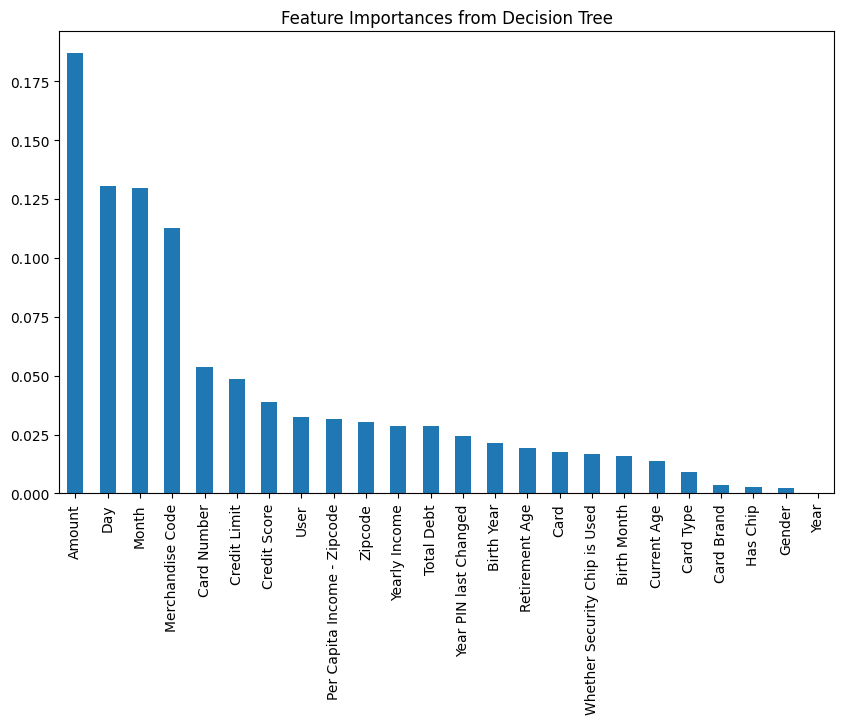

In [8]:
# 수치형 데이터만 선택해서 모델에 사용
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 모델 학습을 위한 데이터셋 준비
X = numeric_data.drop(columns=['Is Fraud?'])
y = data['Is Fraud?']

# 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree 학습
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 변수 중요도 확인
importances = clf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# 중요도 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Decision Tree')
plt.show()


랜덤 포레스트는 여러 개의 결정 트리를 사용해 예측하는 비선형 모델이다. 각 트리가 학습된 후 변수의 중요도를 추출할 수 있다.

Random Forest Feature Importances:
 Amount                           0.221751
Merchandise Code                 0.168782
Day                              0.165880
Month                            0.141563
Credit Limit                     0.030627
Card Number                      0.027766
Credit Score                     0.020958
Zipcode                          0.020782
User                             0.020707
Total Debt                       0.019827
Per Capita Income - Zipcode      0.019806
Yearly Income                    0.019108
Card                             0.017032
Year PIN last Changed            0.016860
Birth Year                       0.015234
Current Age                      0.014590
Whether Security Chip is Used    0.014165
Birth Month                      0.012321
Retirement Age                   0.011922
Card Type                        0.008615
Card Brand                       0.006318
Gender                           0.003569
Has Chip                         0.00181

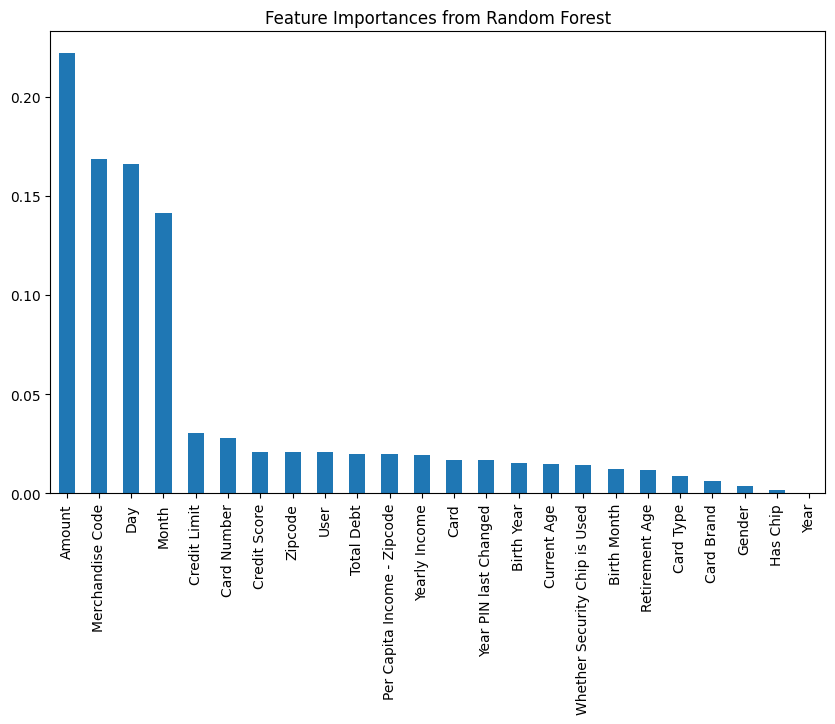

In [9]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 전처리된 데이터로 모델 학습
X = numeric_data.drop(columns=['Is Fraud?'])
y = data['Is Fraud?']

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_clf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 중요도 출력
print("Random Forest Feature Importances:\n", feature_importances)

# 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.show()


- 로지스틱 회귀를 통한 변수 선택
- 로지스틱 회귀는 선형 모델이지만, 각 변수의 계수를 통해 예측에 영향을 미치는 변수를 선택할 수 있다. 이는 모델의 설명성을 높이는 데 유리하다

Logistic Regression Feature Importances:
 Card Number                      1.374473e-15
Total Debt                       3.247037e-23
Yearly Income                    2.362678e-23
Credit Limit                     1.252719e-23
Per Capita Income - Zipcode      1.218661e-23
Amount                           1.625362e-25
Zipcode                          1.257855e-26
Merchandise Code                 3.872799e-27
Birth Year                       5.360374e-28
Year                             5.250787e-28
Year PIN last Changed            5.201050e-28
User                             2.913722e-28
Credit Score                     1.334021e-28
Retirement Age                   1.724054e-29
Current Age                      1.028440e-29
Day                              8.961601e-30
Card                             2.494422e-30
Whether Security Chip is Used    1.683530e-30
Month                            1.472141e-30
Birth Month                      4.890181e-31
Card Type                        4.047

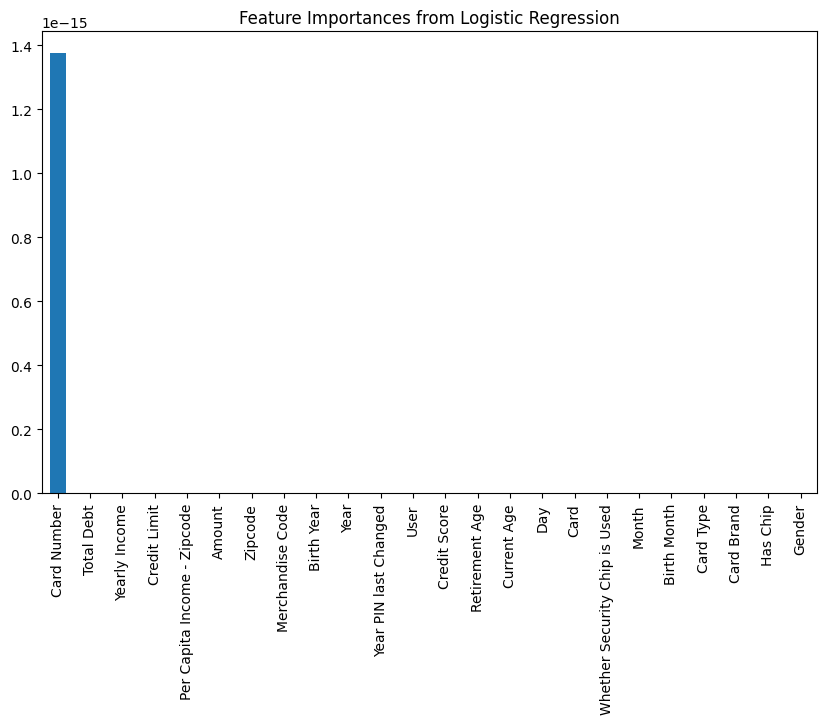

In [10]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
import numpy as np

# 로지스틱 회귀 모델 학습
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 회귀 계수 확인
coefficients = np.abs(log_reg.coef_[0])
feature_importances = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

# 중요도 출력
print("Logistic Regression Feature Importances:\n", feature_importances)

# 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Logistic Regression')
plt.show()


아마 다음과 같이 값이 이상하게 나온 것은 변수의 스케일 문제일 가능성이 높음. 각 변수 간의 값 범위가 매우 다르기 때문에 학습할 때 특정 변수는 중요도가 떨어져 보일 수 있다. 따라서 적당한 스케일링 필요할 것으로 보임!!


XGBoos 모델 사용


XGBoost Feature Importances:
 Merchandise Code                 0.064341
Card Type                        0.063163
Whether Security Chip is Used    0.060250
Card Brand                       0.058572
Has Chip                         0.047077
Current Age                      0.045330
Credit Limit                     0.044857
Credit Score                     0.044712
Per Capita Income - Zipcode      0.044607
Yearly Income                    0.044589
Gender                           0.043918
Birth Year                       0.042655
Total Debt                       0.042040
Retirement Age                   0.041253
Year PIN last Changed            0.041068
Month                            0.039225
Card Number                      0.039039
Zipcode                          0.038746
User                             0.037504
Birth Month                      0.034386
Amount                           0.030393
Card                             0.030176
Day                              0.022098
Year

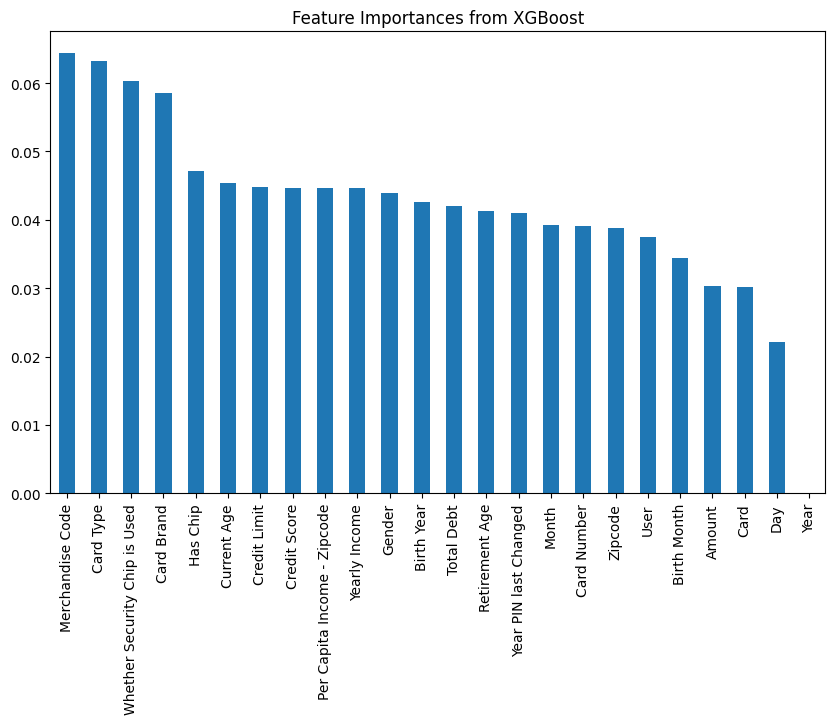

In [11]:
import xgboost as xgb

# XGBoost 모델 학습
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train)

# 변수 중요도 추출
xgb_importances = xgb_clf.feature_importances_
feature_importances = pd.Series(xgb_importances, index=X.columns).sort_values(ascending=False)

# 중요도 출력
print("XGBoost Feature Importances:\n", feature_importances)

# 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from XGBoost')
plt.show()


XGBoost에서 출력된 Feature Importance 결과는 각 변수들이 모델의 예측에 얼마나 기여했는지를 나타낸다. XGBoost는 결정 트리 기반의 앙상블 모델로, 변수 간의 비선형적 관계와 상호작용을 잘 탐지한다.

XGBoost Feature Importance 해석:
Merchandise Code (0.064341): 상품 코드가 사기 예측에서 가장 중요한 변수로 나타났다. 이는 특정 상품 코드에서 사기가 발생할 가능성이 높다는 것을 시사할 수 있다.

Card Type (0.063163): 카드 유형도 사기 예측에서 중요한 역할을 한다. 이는 특정 카드 유형에서 사기 발생 가능성이 더 높을 수 있다는 의미일 수 있다.

Whether Security Chip is Used (0.060250) 및 Has Chip (0.047077): 보안 칩 탑재 여부가 중요하게 작용하고 있다. 이는 보안 칩이 있는 카드가 사기 방지에 효과적일 수 있음을 나타낸다.

Card Brand (0.058572): 카드 브랜드도 사기 예측에 영향을 미친다. 특정 브랜드의 카드가 사기에 더 취약하거나, 반대로 더 안전할 수 있다.

Amount (0.030393): 거래 금액의 중요도가 상대적으로 낮게 나타났다. 이는 XGBoost 모델이 다른 변수와의 상호작용을 더 잘 탐지하면서, 금액 자체만으로는 사기 예측에서 중요하지 않다고 판단했을 가능성이 있다.

[20241016] User 별로 비교해보기 -> 데이터 전처리
- label_encode_columns 함수: 모든 범주형 열을 자동으로 탐지하고 LabelEncoder를 적용하여 라벨을 부여. 숫자가 아닌 데이터에 대해서만 변환을 수행.
- True/False 및 Yes/No 변환: 수동으로 1/0으로 변환하는 부분은 그대로 유지.
- 생년월일 처리: 생년월일을 YYYYMMDD 형식으로 변환.
- 결과 저장: 변환된 데이터는 CSV로 저장하고, 범주형 컬럼들의 라벨 정보(LabelEncoder 클래스)를 출력해 확인 가능.

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터셋 불러오기
file_path = "/Users/gidaseul/Desktop/대학교/3-2/데이터사이언스/Project1/[24-2 DS_Project1] Data_Submission/[24-2 DS_Project1] Data.csv"
df = pd.read_csv(file_path)

# 1. User 단위로 그룹화하여 데이터 처리
grouped_df = df.groupby('User').apply(lambda x: x)

# 2. 범주형 데이터 자동 라벨링을 위한 함수
def label_encode_columns(df):
    label_encoders = {}
    for column in df.columns:
        # 숫자가 아닌 데이터를 라벨 인코딩
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            le = LabelEncoder()
            df[column] = df[column].astype(str)  # LabelEncoder는 str 타입만 처리 가능
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le  # 각 컬럼의 라벨 인코더 저장
    return df, label_encoders

# 3. 범주형 데이터 자동 라벨링 적용
df, label_encoders = label_encode_columns(df)

# 4. True/False, Yes/No -> 1/0 변환
df['Has Chip'] = df['Has Chip'].map({True: 1, False: 0})
df['Is Fraud?'] = df['Is Fraud?'].map({'Yes': 1, 'No': 0})

# 5. 생년월일 처리 (연도 + 월 + 일 통합, 월/일이 없을 경우 각각 12월, 31일로 설정)
df['Birth Month'] = df['Birth Month'].fillna(12).astype(int)  # 월이 없으면 12월로
df['Birth Day'] = 31  # 일 정보는 없으면 기본적으로 31일로 설정

# 생년월일을 YYYYMMDD로 변환
df['Birth Year'] = df['Birth Year'].astype(int)  # 네 자리 연도로
df['Birth Date'] = df['Birth Year'].astype(str) + \
                   df['Birth Month'].apply(lambda x: f'{x:02d}') + \
                   df['Birth Day'].apply(lambda x: f'{x:02d}')

# 처리된 데이터 확인
print(df[['Birth Year', 'Birth Month', 'Birth Date']].head())

# 처리된 데이터 저장
df.to_csv('processed_data_with_birthdate_and_auto_labels.csv', index=False)

# 추가적으로 각 컬럼의 라벨 정보를 확인할 수 있도록 저장
for column, le in label_encoders.items():
    print(f"Column: {column}, Classes: {le.classes_}")



/var/folders/hm/c8hmxzvj40925mjl628k9zgr0000gn/T/ipykernel_52424/1453405105.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df.groupby('User').apply(lambda x: x)


   Birth Year  Birth Month Birth Date
0        1966           11   19661131
1        1966           11   19661131
2        1966           11   19661131
3        1966           11   19661131
4        1966           11   19661131
Column: Card Brand, Classes: ['Mastercard' 'Others' 'Visa']
Column: Card Type, Classes: ['Credit' 'Debit' 'Debit (Prepaid)']
Column: Expires, Classes: ['01/2020' '01/2021' '01/2022' '01/2023' '01/2024' '02/2020' '02/2021'
 '02/2022' '02/2023' '02/2024' '03/2020' '03/2021' '03/2022' '03/2023'
 '03/2024' '04/2020' '04/2021' '04/2022' '04/2023' '04/2024' '05/2020'
 '05/2021' '05/2022' '05/2023' '05/2024' '06/2020' '06/2021' '06/2022'
 '06/2023' '06/2024' '07/2020' '07/2021' '07/2022' '07/2023' '07/2024'
 '08/2020' '08/2021' '08/2022' '08/2023' '08/2024' '09/2020' '09/2021'
 '09/2022' '09/2023' '09/2024' '10/2020' '10/2021' '10/2022' '10/2023'
 '10/2024' '11/2020' '11/2021' '11/2022' '11/2023' '11/2024' '12/2020'
 '12/2021' '12/2022' '12/2023' '12/2024']
Column: Acc

In [30]:
df.head

<bound method NDFrame.head of          User  Gender  Current Age  Retirement Age  Birth Year  Birth Month  \
0           0       0           53              66        1966           11   
1           0       0           53              66        1966           11   
2           0       0           53              66        1966           11   
3           0       0           53              66        1966           11   
4           0       0           53              66        1966           11   
...       ...     ...          ...             ...         ...          ...   
1644763  1999       0           21              60        1998           11   
1644764  1999       0           21              60        1998           11   
1644765  1999       0           21              60        1998           11   
1644766  1999       0           21              60        1998           11   
1644767  1999       0           21              60        1998           11   

         Zipcode  Per